In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from collections import Counter

In [2]:
path = './dataset/combine/1.storke_combine_code_multi.csv'  # 数据文件路径
data = pd.read_csv(path)
data

,NIHSS,original_shape_Elongation,original_firstorder_Skewness,original_glcm_SumSquares,original_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet-LLH_glrlm_GrayLevelVariance,wavelet-LLH_glrlm_ShortRunEmphasis,wavelet-LLH_gldm_GrayLevelVariance,wavelet-LLH_glszm_GrayLevelNonUniformity,wavelet-LHL_firstorder_90Percentile,...,Drinkalcohol _1.0,Drinkalcohol _2.0,Drinkalcohol _nan,Drinkalcohol _-1,OCSP_4.0,OCSP_3.0,OCSP_2.0,OCSP_1.0,OCSP_nan,OCSP_-1
0,1,0.738549,0.839896,0.124461,0.177170,0.0,0.548433,0.000000,0.160000,0.167006,...,1,0,0,0,1,0,0,0,0,0
1,0,0.565605,0.470144,0.373676,0.029411,0.0,0.431860,0.000000,0.160000,0.491783,...,1,0,0,0,0,1,0,0,0,0
2,0,0.451330,0.392714,0.068449,0.106469,0.0,0.495983,0.000000,0.160000,0.497301,...,1,0,0,0,1,0,0,0,0,0
3,1,0.526684,0.559507,0.259127,0.101416,0.0,0.527322,0.000000,0.160000,0.502619,...,1,0,0,0,1,0,0,0,0,0
4,1,0.361088,0.537769,0.358092,0.136858,0.0,0.496154,0.000000,0.160000,0.287731,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,1,0.612372,0.399782,0.162807,1.000000,0.0,0.495726,0.027778,0.142222,0.617653,...,1,0,0,0,0,1,0,0,0,0
437,1,0.381966,0.474117,0.412876,1.000000,0.0,0.512821,0.062500,0.040000,0.364419,...,0,1,0,0,1,0,0,0,0,0
438,0,0.408248,0.778201,0.033750,1.000000,0.0,0.536325,0.015625,0.110000,0.252465,...,1,0,0,0,1,0,0,0,0,0
439,1,0.577350,0.495877,0.173803,1.000000,0.0,0.613248,0.040000,0.089600,0.544976,...,0,1,0,0,0,1,0,0,0,0


In [3]:
X = data.iloc[:,1:]
Y = data.iloc[:,0]
y = pd.Categorical(Y).codes #把文本数据进行编码，比如a b c编码为 0 1 2

## 数据分割
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=3, train_size=0.3)

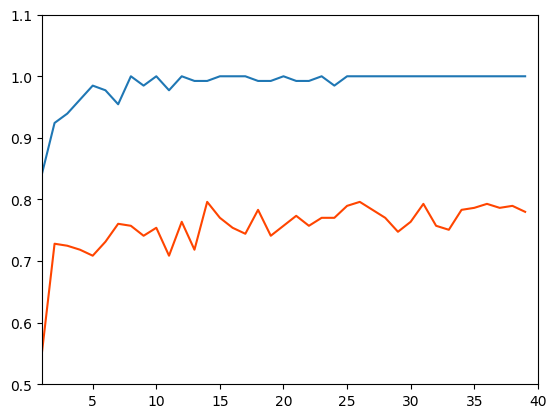

In [4]:
def rf_model(k):
    return RandomForestClassifier(n_estimators = k, criterion="gini")

def svc_model(model):
    model.fit(x_train, y_train)
    acu_train = model.score(x_train, y_train)
    acu_test = model.score(x_test, y_test)
    y_pred = model.predict(x_test)
    recall = recall_score(y_test, y_pred, average="macro")
    return acu_train, acu_test, recall
    
def run_rf(kmax):
    result = {
              "k":[],
              "acu_train": [],
              "acu_test": [],
              "recall": []
              }
    for i in range(1,kmax+1):
        acu_train, acu_test, recall = svc_model(rf_model(i))
        result["k"].append(i)
        result["acu_train"].append(acu_train)
        result["acu_test"].append(acu_test)
        result["recall"].append(recall)
    return pd.DataFrame(result)

df = run_rf(40)
df["acu_test"].plot(color='orangered')
df["acu_train"].plot()
plt.xlim(1,40)
plt.ylim(0.5,1.1)
plt.show()

In [5]:
print(Counter(y))

Counter({1: 289, 0: 106, 2: 46})


In [6]:
model = RandomForestClassifier(n_estimators = 22, criterion="gini",random_state=4)
model.fit(x_train, y_train)
acu_test = model.score(x_test, y_test)
acu_train = model.score(x_train, y_train)
print(acu_train,acu_test)

1.0 0.7766990291262136


In [7]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X1_resampled, y1_resampled = ros.fit_resample(X, y)
print(Counter(y1_resampled))

Counter({1: 289, 0: 289, 2: 289})


In [8]:
x_train, x_test, y_train, y_test = train_test_split(X1_resampled, y1_resampled, random_state=3, train_size=0.3)
model = RandomForestClassifier(n_estimators = 22, criterion="gini",random_state=4)
model.fit(x_train, y_train)
acu_test = model.score(x_test, y_test)
acu_train = model.score(x_train, y_train)
print(acu_train,acu_test)

1.0 0.8121911037891268


In [9]:
from imblearn.over_sampling import SMOTE, ADASYN
X2_resampled, y2_resampled = SMOTE().fit_resample(X, y)
print(sorted(Counter(y2_resampled).items()))

[(0, 289), (1, 289), (2, 289)]


In [10]:
x_train, x_test, y_train, y_test = train_test_split(X2_resampled, y2_resampled, random_state=3, train_size=0.3)
model = RandomForestClassifier(n_estimators = 22, criterion="gini",random_state=4)
model.fit(x_train, y_train)
acu_test = model.score(x_test, y_test)
acu_train = model.score(x_train, y_train)
print(acu_train,acu_test)

1.0 0.8072487644151565


In [11]:
X3_resampled, y3_resampled = ADASYN().fit_resample(X, y)
x_train, x_test, y_train, y_test = train_test_split(X3_resampled, y3_resampled, random_state=3, train_size=0.3)
model = RandomForestClassifier(n_estimators = 22, criterion="gini",random_state=4)
model.fit(x_train, y_train)
acu_test = model.score(x_test, y_test)
acu_train = model.score(x_train, y_train)
print(acu_train,acu_test)

1.0 0.8116883116883117


In [12]:
from imblearn.over_sampling import BorderlineSMOTE
X4_resampled, y4_resampled = BorderlineSMOTE().fit_resample(X, y)
x_train, x_test, y_train, y_test = train_test_split(X4_resampled, y4_resampled, random_state=3, train_size=0.3)
model = RandomForestClassifier(n_estimators = 22, criterion="gini",random_state=4)
model.fit(x_train, y_train)
acu_test = model.score(x_test, y_test)
acu_train = model.score(x_train, y_train)
print(acu_train,acu_test)

1.0 0.7957166392092258


In [13]:
from imblearn.over_sampling import BorderlineSMOTE
X5_resampled, y5_resampled = BorderlineSMOTE(kind='borderline-1').fit_resample(X, y)
x_train, x_test, y_train, y_test = train_test_split(X5_resampled, y5_resampled, random_state=3, train_size=0.3)
model = RandomForestClassifier(n_estimators = 22, criterion="gini",random_state=4)
model.fit(x_train, y_train)
acu_test = model.score(x_test, y_test)
acu_train = model.score(x_train, y_train)
print(acu_train,acu_test)

1.0 0.8401976935749588


In [14]:
from imblearn.over_sampling import BorderlineSMOTE
X6_resampled, y6_resampled = BorderlineSMOTE(kind='borderline-2').fit_resample(X, y)
x_train, x_test, y_train, y_test = train_test_split(X6_resampled, y6_resampled, random_state=3, train_size=0.3)
model = RandomForestClassifier(n_estimators = 22, criterion="gini",random_state=4)
model.fit(x_train, y_train)
acu_test = model.score(x_test, y_test)
acu_train = model.score(x_train, y_train)
print(acu_train,acu_test)

1.0 0.7660626029654036


In [15]:
from imblearn.over_sampling import SVMSMOTE
# sampling = {'minority','not minority','not majority','all',dict}
# for each in sampling:
for i in range(1,20):
    X7_resampled, y7_resampled = SVMSMOTE(sampling_strategy = 'not majority',random_state=4,k_neighbors=i).fit_resample(X, y)
    x_train, x_test, y_train, y_test = train_test_split(X7_resampled, y7_resampled, random_state=3, train_size=0.3)
    model = RandomForestClassifier(n_estimators = 22, criterion="gini",random_state=4)
    model.fit(x_train, y_train)
    acu_test = model.score(x_test, y_test)
    acu_train = model.score(x_train, y_train)
    print(acu_train,acu_test)

1.0 0.82
0.9953051643192489 0.814
1.0 0.822
1.0 0.78
1.0 0.804
1.0 0.79
1.0 0.792
0.9953051643192489 0.796
0.9953051643192489 0.788
1.0 0.798
0.9953051643192489 0.806
0.9906103286384976 0.796
0.9953051643192489 0.792
0.9953051643192489 0.798
0.9953051643192489 0.796
0.9953051643192489 0.782
0.9953051643192489 0.772
0.9953051643192489 0.77
1.0 0.81


In [16]:
from imblearn.over_sampling import SVMSMOTE
import sklearn.svm as svm
add = {0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9}
for i in add:
    X7_resampled, y7_resampled = SVMSMOTE(sampling_strategy = 'not majority',random_state=4,k_neighbors=5,out_step=i).fit_resample(X, y)
    x_train, x_test, y_train, y_test = train_test_split(X7_resampled, y7_resampled, random_state=3, train_size=0.3)
    model = RandomForestClassifier(n_estimators = 22, criterion="gini",random_state=4)
    model.fit(x_train, y_train)
    acu_test = model.score(x_test, y_test)
    acu_train = model.score(x_train, y_train)
    print(acu_train,acu_test)

0.9953051643192489 0.796
1.0 0.792
0.9953051643192489 0.782
1.0 0.816
1.0 0.804
1.0 0.79
1.0 0.774
1.0 0.764
1.0 0.798


In [16]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=2)
X8_resampled, y8_resampled = smote_enn.fit_resample(X, y)
x_train, x_test, y_train, y_test = train_test_split(X8_resampled, y8_resampled, random_state=3, train_size=0.3)
model = RandomForestClassifier(n_estimators = 45, criterion="gini",random_state=4)
model.fit(x_train, y_train)
acu_test = model.score(x_test, y_test)
acu_train = model.score(x_train, y_train)
print(acu_train,acu_test)

1.0 0.8656036446469249


In [17]:
print(sorted(Counter(y).items()))

[(0, 106), (1, 289), (2, 46)]


In [18]:
print(sorted(Counter(y8_resampled).items()))

[(0, 235), (1, 103), (2, 288)]


In [19]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X9_resampled, y9_resampled = smote_tomek.fit_resample(X, y)
x_train, x_test, y_train, y_test = train_test_split(X9_resampled, y9_resampled, random_state=3, train_size=0.3)
model = RandomForestClassifier(n_estimators = 22, criterion="gini",random_state=4)
model.fit(x_train, y_train)
acu_test = model.score(x_test, y_test)
acu_train = model.score(x_train, y_train)
print(acu_train,acu_test)

0.9961240310077519 0.8148760330578513


In [20]:
print(sorted(Counter(y9_resampled).items()))

[(0, 287), (1, 287), (2, 289)]


In [22]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X10_resampled, y10_resampled = cc.fit_resample(X, y)
print(sorted(Counter(y10_resampled).items()))
x_train, x_test, y_train, y_test = train_test_split(X10_resampled, y10_resampled, random_state=3, train_size=0.3)
model = RandomForestClassifier(n_estimators = 22, criterion="gini",random_state=4)
model.fit(x_train, y_train)
acu_test = model.score(x_test, y_test)
acu_train = model.score(x_train, y_train)
print(acu_train,acu_test)

[(0, 46), (1, 46), (2, 46)]
1.0 0.6907216494845361


In [23]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X11_resampled, y11_resampled = rus.fit_resample(X, y)
print(sorted(Counter(y11_resampled).items()))
x_train, x_test, y_train, y_test = train_test_split(X10_resampled, y10_resampled, random_state=3, train_size=0.3)
model = RandomForestClassifier(n_estimators = 22, criterion="gini",random_state=4)
model.fit(x_train, y_train)
acu_test = model.score(x_test, y_test)
acu_train = model.score(x_train, y_train)
print(acu_train,acu_test)

[(0, 46), (1, 46), (2, 46)]
1.0 0.6907216494845361
